<center><h1>XGBoost For Music Genre Classification</h1></center>

## Abstract

<p>
This report aims to show an approach on how to solve an interesting problem which resolves around classifying music genres.
The music genre classification has been implemented in many applications that we use in our everyday lives.
The most famous app for that purpose is "Shazam".

In the report we first focus on exploring the data that we have and see what we are dealing with.
We do some visualization in order to see the class distribution of the training dataset and detect potential outliers.

After we have obtained information about our data, the next step is to preprocess it in order to feed it to the classifier.
We use the <b>XGBoost</b> classifier to classify the music genres.

At the end we evaluate the performance of the classifier using accuracy and LogLoss.
With the accuracy measure, we get score of <b>0.667</b> and with LogLoss measure, we get score of <b>0.186</b>
</p>



## 1. Introduction

<p>
The aim of this project is to get our hands on a real-world data, analyse the data and see what we are dealing with, use the right preprocessing tools to try to improve the quality of the data and try to find the classification algorithm that performs best with the data that we have.


In this report we address couple of different questions, such has:
<ul>
    <li>
        How does our data look like?
    </li>
    <li>
        How to visualize our data in order to get a better representation of it?
    </li>
    <li>
        How to deal with imbalanced datasets?
    </li>
    <li>
        How to do hyperparameter tunning?
    </li>
    <li>
        How to evaluate the performance of our algorithm?
    </li>
</ul>


Music plays huge role in our everyday lives.
Music classification is a "hot" topic right now. Many big companies try to or have already developed a good classifier that gives satisfying results and use it in their applications in order to simplify the lives of the users.<br>
The classifiers that have been developed give good results but are not perfect and there is still room for improvement.
</p>

## 2. Data analysis

In [96]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
# Load the data
def get_data(path):
    data = pd.read_csv(path, header=None)
    data_matrix = data.as_matrix()
    return data_matrix

X_train = get_data('data/train_data.csv')
y_train = get_data('data/train_labels.csv')
X_test = get_data('data/test_data.csv')

# Convert y_train to 1d array for the LogisticRegression
y_train = np.ravel(y_train)

print('The number of dimensions that the data has is: {0}'.format(X_train.shape[1]))
print('The number of training samples is: {0}'.format(X_train.shape[0]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


The number of dimensions that the data has is: 264
The number of training samples is: 4363


<p>
From the code above, we can see that out data contains 4363 samples and has relatively high dimensionality - 264 dimensions.
</p>

<p>
Now we take a peek into the training data to see how it looks like 
</p>

In [98]:
X_train_df = pd.DataFrame(X_train)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
0,1040.7,2315.6,2839.1,2552.2,2290.4,1913.8,2152.6,1930.3,2079.3,1706.7,...,0.216490,0.36548,0.093584,0.166870,0.083426,0.118090,0.089792,0.074371,0.073162,0.059463
1,2309.4,4780.4,4055.7,3120.5,1979.9,2343.6,2634.2,3208.5,3078.0,3374.7,...,0.100670,0.14739,0.102560,0.213040,0.082041,0.080967,0.076450,0.052523,0.052357,0.055297
2,2331.9,4607.0,4732.3,5007.0,3164.9,3171.9,2915.7,3282.3,2400.0,1895.2,...,0.126760,0.36321,0.114200,0.223780,0.100770,0.186910,0.067270,0.061138,0.085509,0.049422
3,3350.9,6274.4,5037.0,4609.7,3438.8,3925.8,3746.4,3539.4,3053.7,3075.4,...,0.096479,0.28950,0.074124,0.201580,0.049032,0.130210,0.045800,0.080885,0.148910,0.042027
4,2017.6,3351.8,2924.9,2726.3,1979.9,1930.9,2083.4,1889.2,1695.4,1911.7,...,0.138340,0.38266,0.079402,0.063495,0.053717,0.086750,0.062090,0.048999,0.033159,0.070813


<p>
The data is distributed in 10 classes, each of which represents a music genre.
These are the genres that we will train our classifier to predict:
<ol>
    <li>Pop_Rock</li>
    <li>Electronic</li>
    <li>Rap</li>
    <li>Jazz</li>
    <li>Latin</li>
    <li>RnB</li>
    <li>International</li>
    <li>Country</li>
    <li>Reggae</li>
    <li>Blues</li>
</ol>
</p>

<p>
    Next thing we can do is to visualize the class distribution to see what kind of data we are dealing with
</p>

<BarContainer object of 10 artists>

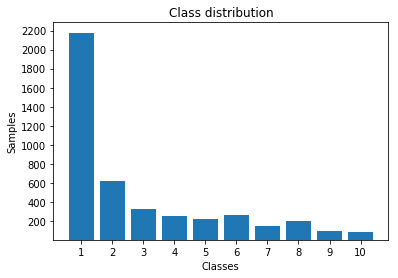

In [99]:
# Visualize the class distribution

df_x = pd.DataFrame(X_train)
df_y = pd.DataFrame({'Label': y_train})
df = pd.concat([df_x, df_y], axis=1)


label_1 = df.loc[df['Label'] == 1]
label_2 = df.loc[df['Label'] == 2]
label_3 = df.loc[df['Label'] == 3]
label_4 = df.loc[df['Label'] == 4]
label_5 = df.loc[df['Label'] == 5]
label_6 = df.loc[df['Label'] == 6]
label_7 = df.loc[df['Label'] == 7]
label_8 = df.loc[df['Label'] == 8]
label_9 = df.loc[df['Label'] == 9]
label_10 = df.loc[df['Label'] == 10]


n_classes = np.arange(1, 11, 1)
num_in_class = [len(label_1), len(label_2), len(label_3), len(label_4), len(label_5), len(label_6), len(label_7), len(label_8), len(label_9), len(label_10)]

fig, ax = plt.subplots()
ax.set_xticks(n_classes)
ax.set_yticks(np.arange(200, 2500, 200))
plt.xlabel('Classes')
plt.ylabel('Samples')
plt.title('Class distribution') 
plt.bar(n_classes, num_in_class)

<p>
From the histogram above, we can see that the data is highly imbalanced.
The most of the data is from class 1 (about 50%) and the rest is divided between the other classes. 
</p>

<p>
In order to visualize the fearutes, we can reduce the dimensionality with principal component analysis and use 2 principal components for the visualization.
We do that in the next block
</p>

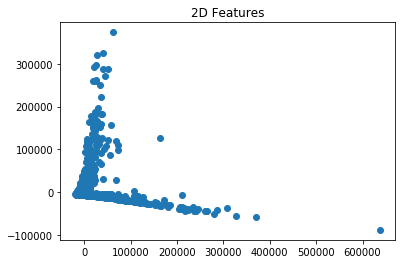

In [100]:
from sklearn.decomposition import PCA

pca = PCA(
    n_components = 2
)


X_train_pca = pca.fit_transform(X_train)

df_pca = pd.DataFrame(X_train_pca)

plt.title('2D Features')
plt.scatter(df_pca[0], df_pca[1])

<p>
In the histograms below, we can see how the feature values are distributed for the first 2 principal components of the <b>unnormalized</b> data.
    
This can be useful for detecting outliers.
</p>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbc54c8ba8>,
      dtype=object)

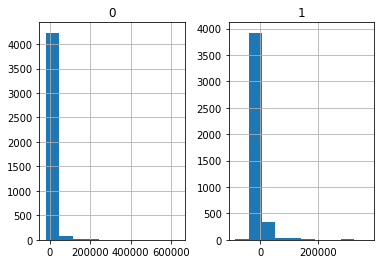

In [101]:
df_pca.hist()

<p>
In the density plot below, we can see how the feature values are distributed for the first 2 principal components of the <b>unnormalized</b> data.
    
This can also help us in detecting outliers.
</p>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbbd9a1438>,
      dtype=object)

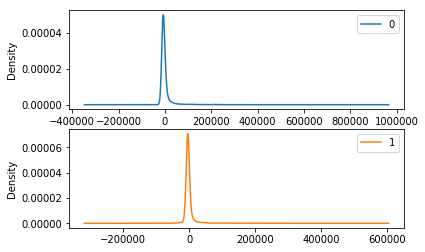

In [102]:
df_pca.plot(kind='density',subplots=True,sharex=False)

<p>
From the above blocks, we can see that different feature values are in different range which can be bad for the classification algorithm.
In order to fix this problem, we do <b>feature scaling</b>.
</p>

In [103]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
def feature_scaling(X_train, X_test):   
    sc = StandardScaler()

    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test

X_train, X_test = feature_scaling(X_train, X_test)


X_train_df = pd.DataFrame(X_train)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
0,-1.571333,-1.423949,-0.935285,-1.169432,-0.772396,-1.258998,-0.811812,-0.985136,-0.581884,-0.756522,...,1.279245,1.266232,-0.158097,0.297566,0.164625,0.499226,0.921775,-0.185416,0.092879,0.006096
1,-0.602171,0.267213,0.055395,-0.711935,-1.073589,-0.876857,-0.373028,0.155161,0.399480,0.963212,...,-0.897103,-0.852736,0.074136,1.103637,0.111916,-0.726099,0.269456,-1.177036,-0.694615,-0.223800
2,-0.584983,0.148239,0.606352,0.806748,0.075890,-0.140405,-0.116555,0.220999,-0.266751,-0.562176,...,-0.406852,1.244176,0.375294,1.291144,0.824687,2.770780,-0.179373,-0.786025,0.560227,-0.548004
3,0.193432,1.292285,0.854470,0.486911,0.341579,0.529897,0.640292,0.450361,0.375602,0.654629,...,-0.975856,0.528008,-0.661580,0.903560,-1.144311,0.899273,-1.229087,0.110236,2.960029,-0.956088
4,-0.825078,-0.712986,-0.865418,-1.029277,-1.073589,-1.243794,-0.874860,-1.021802,-0.959120,-0.545164,...,-0.189255,1.433153,-0.525024,-1.507232,-0.966014,-0.535219,-0.432634,-1.336981,-1.421282,0.632431


<p>
Now our data is scaled 
</p>

<p>
Below of the scatter plot of the rescaled features 
</p>

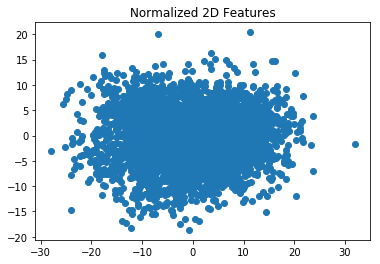

In [104]:
# rescale the values
X_train_pca = pca.fit_transform(X_train)

df_pca = pd.DataFrame(X_train_pca)

plt.title('Normalized 2D Features')
plt.scatter(df_pca[0], df_pca[1])

<p>
In the histograms below, we can see how the feature values are distributed for the first 2 principal components of the <b>normalized</b> data.
</p>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbc8246080>,
      dtype=object)

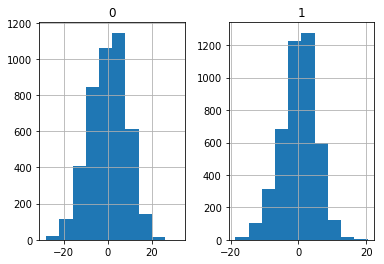

In [105]:
df_pca.hist()

<p>
In the density plot below, we can see how the feature values are distributed for the first 2 principal components of the <b>normalized</b> data.
</p>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbc823d588>,
      dtype=object)

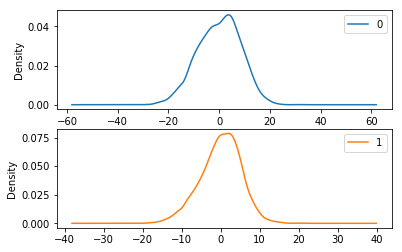

In [106]:
df_pca.plot(kind='density',subplots=True,sharex=False)

## 3. Methods and experiments

<p>
From the data analysis that was done above, we saw that our data is highly imbalanced, with almost half of the samples being from the first class.
    
There are multiple ways to deal with imbalanced datasets and we will discuss some of them below.
</p>

<p>
<h4>Class balancing</h4>

We can deal with imbalanced data in many ways. For example we can remove some of the data from the first class (the class from where most of the samples are) and balance it that way.
Another approach that we can do is to duplicate some of the data from the classes that don't have that many samples. We should be cautious with this approach because duplicating more data might cause the classifier to overfit.

Below is a code that removes some of the data from the first class and duplicates some of the data from classes 7, 9 and 10.
</p>

In [107]:
# Additional preprocessing
def balance_classes(X_train, y_train):
    df_x = pd.DataFrame(X_train)
    df_y = pd.DataFrame({'Label': y_train})
    df = pd.concat([df_x, df_y], axis=1)

#     remove elements from classes
    label_1 = df.loc[df['Label'] == 1]
    indexes = label_1.index.values
    indexes = indexes[:int(len(indexes) / 1.7)]
    df = df.drop(df.index[indexes])  
    df = df.reset_index(drop=True)
        
    
#     duplicate classes
    label_10 = df.loc[df['Label'] == 10]
    label_10 = label_10.iloc[:int(len(label_10) / 2), :]
    df = df.append([label_10] * 1, ignore_index=True)

    label_9 = df.loc[df['Label'] == 9]
    label_9 = label_9.iloc[:int(len(label_9) / 2), :]
    df = df.append([label_9] * 1, ignore_index=True)
    
    label_7 = df.loc[df['Label'] == 7]
    label_7 = label_7.iloc[:int(len(label_7) / 3), :]
    df = df.append([label_7] * 1, ignore_index=True)

    
    df = df.reset_index(drop=True)

    # reshuffle the data
    df = df.sample(frac=1).reset_index(drop=True)

    df_x = df.drop('Label', axis=1)
    df_y = df['Label']

    df_x.to_csv('data/preprocessed_train_data.csv', index=False, header=False)
    df_y.to_csv('data/preprocessed_labels.csv', index=False, header=False)

<p>
In my case, removing some data and duplicating some <b>did not</b> give me better results so I did not use that code for the end result.
The reason for that might be because we don't have that many data points so, removing samples causes the classifiers to perform worse.
<br>
<h4>PCA</h4>

Next thing we can do to the data is to perform dimensionality reduction since our data has relatively high dimensionality.
We can achieve that with Principal Component Analysis, the same way as we did it for the visualization.
The only difference is that now we use 80 principal components instead of just 2.

From the block below we can see that if we have 80 dimensions, those dimensions explain 91% of the data.
</p>

In [108]:
# Dimensionality reduction with PCA
pca = PCA(
    n_components = 80
)


X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
print(sum(explained_variance))

0.9120270270896782


<p>
In my case, using the PCA approach resulted in faster computation since the number of dimensions was drastically reduced.
Using PCA <b>did not</b> improve the accuracy so I am not using it in the final solution.
</p>

<p>
The decision for choosing the best classifier was done using trial and error approach.
In order to find the best hyperparameters for every classifier I used the grid search method, which searches between multiple parameters and finds the parameter that gives the best accuracy for our training data.
    
I have tried using different classifiers, such as: <b>Logistic Regression, Support Vector Machines, Random Forests, Neural Network, Bagging Classifier, Ada Boost Classifier and Gradient Boosting Classifier</b>.

In the cell below we can see the best hyperparameters for different classifiers that I have tried.
</p>

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb


LR = LogisticRegression(
    random_state = 0,
    solver = 'saga',
    multi_class = 'ovr',
    max_iter = 500,
    penalty = 'l1',
    C = 1,
    fit_intercept = True,
    class_weight = None
)


SVM = SVC(
    kernel = 'rbf',
    random_state = 0,
    C = 5,
    gamma = 0.003,
    probability = True
)



RF = RandomForestClassifier(
    random_state = 0,
    n_estimators = 200,
    criterion = 'gini',
    max_depth = None,
    min_samples_split = 2,
    min_samples_leaf = 2,
    min_weight_fraction_leaf = 0,
    max_features = 'auto',
    min_impurity_decrease = 0.0,
    bootstrap = False,
    class_weight = 'balanced'   
)



NN = MLPClassifier(
    random_state = 0,
    max_iter = 500,
    hidden_layer_sizes = (500,),
    activation = 'logistic',
    solver = 'sgd',
    alpha = 0.1,
    learning_rate = 'adaptive',
    shuffle = False,
    momentum = 0.9,
    nesterovs_momentum = False
)


bc = BaggingClassifier(
    base_estimator = RF,
    n_estimators = 15,
    bootstrap = False
    
)


ada = AdaBoostClassifier(
    random_state = 0,
    n_estimators = 80,
    algorithm = 'SAMME'
)


gbc = GradientBoostingClassifier(
    loss =  'deviance',
    n_estimators = 1000,
    subsample = 0.8,
    criterion = 'friedman_mse',
    max_features = 'sqrt'
)



bst = xgb.XGBClassifier(
    booster = 'gbtree',
    n_estimators = 500
)



<p>
From all the classifiers defined above, <b>XGBClassifier</b> with <b>Gradient Boosting Tree</b> gave the best results, so I am using that one for measuring the performance.
</p>

<h4>Grid search</h4>
<p>
In the cell below, we can see an example of grid search, which helped in finding the best hyperparameters for the classifiers.
</p>

In [111]:
# Grid search
from sklearn.model_selection import GridSearchCV


parameters = [{'booster': ['gbtree'],
               'objective': ['reg:linear']
              }
             ]

grid_search = GridSearchCV(
    estimator = bst,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = 2,
    n_jobs = -1
)

grid_search = grid_search.fit(X_train, y_train)


# Best score
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)

0.637405454962182
{'booster': 'gbtree', 'objective': 'reg:linear'}


## 4. Results

<p>
In order to measure the performace of our classifier, we can split the training data.
We do that in the following block:
</p>

In [112]:
# split the data
from sklearn.model_selection import train_test_split

X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

# train the classifier with the splitted data
bst.fit(X_train_split, y_train_split)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

<p>
Next thing we do is to check the <b>accuracy</b> of the classifier.
</p>

In [113]:
from sklearn.metrics import accuracy_score

y_pred_split = bst.predict(X_test_split)

print(accuracy_score(y_test_split, y_pred_split))


0.6455309396485867


<p>
For the accuracy measure on the splitted data we got <b>0.6455</b> 
</p>

<p>
In the next block, we measure the <b>LogLoss</b> of the classifier.
</p>

In [114]:
from sklearn.metrics import log_loss

y_pred_split_logloss = bst.predict_proba(X_test_split)

print(log_loss(y_test_split, y_pred_split_logloss))

1.3182234124067287


<p>
For the LogLoss measure on the splitted data we got <b>1.3182</b>
</p>

<p>
Next thing we do is build a confussion matrix and compare the predicted and the real labels and see on which classes our classifier performed good and on which it performed worse. 
</p>

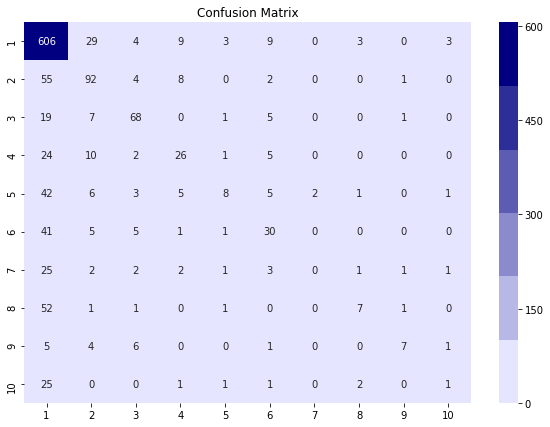

In [115]:
#Confusion matrix ...
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (10, 7))

y_pred_split = bst.predict(X_test_split)

cm = confusion_matrix(y_test_split, y_pred_split)

df_cm = pd.DataFrame(cm, range(1, 11), range(1, 11))

plt.title('Confusion Matrix')
cmap = sns.light_palette("navy")
sns.heatmap(df_cm, annot=True, fmt='g', cmap=cmap)

<p>
From the confussion matrix we can see that the classifier struggled the most with the first class, which was expected because the data set in not balanced and most of the samples are form the first class.
The classifier misclassified some of the classed and confused them with the first class because it has seen too many samples from the first class and a lot less from the other classes.
</p>

<p>
In the table below, we show the performance of different classifiers on the training data
</p>

In [116]:
training_results = pd.DataFrame(columns=['XGBoost', 'Neural Network', 'Logistic Regression', 'Support Vector Machines'])
training_results.style.set_properties(**{'text-align': 'left'})
training_results.loc['Accuracy'] = [0.645, 0.663, 0.654, 0.656]
training_results.loc['LogLoss'] = [1.318, 1.120, 1.150, 1.096]
training_results

,XGBoost,Neural Network,Logistic Regression,Support Vector Machine
Accuracy,0.645,0.663,0.654,0.656
LogLoss,1.318,1.120,1.150,1.096


<p>
Although on the training data, some classifiers performed better than XGBoost, on the Kaggle competition, XGBoost got the best accuracy score
</p>

<p>
In order to see how well we did on the Kaggle competition I use the code below.
First I reinitialize and retrain the classifier.
</p>

In [117]:
# reinitialize the classifier
bst = xgb.XGBClassifier(
    booster = 'gbtree',
    n_estimators = 500
)


# train the classifier
bst.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

<p>
I have used two methods for measuring the performance of the classificator: accuracy and LogLoss. 
</p>

<p>
I am using the code below to measure the <b>accuracy</b> and compare it on Kaggle.
In this case I am not splitting the training data into train and test but instead, I am using all the training data.
</p>

In [118]:
# Accuracy
y_pred = bst.predict(X_test)
index = list(range(1, len(y_pred) + 1))

df = pd.DataFrame({'Sample_id': index, 'Sample_label': y_pred})
df.to_csv('BST.csv', sep=',', index=False)

<p>
After uploading the 'BST.csv' file on Kaggle, I got <b>0.6673</b> accuracy 
</p>

<p>
In order to measure the <b>LogLoss</b> and compare it on Kaggle, I am using the code below.
Just like for the accuracy, I am not splitting the training data but instead I am using the whole data.
</p>

In [119]:
# LogLoss
y_pred_logloss = bst.predict_proba(X_test)
index = list(range(1, len(y_pred_logloss) + 1))

columns = [
    'Class_1',
    'Class_2',
    'Class_3',
    'Class_4',
    'Class_5',
    'Class_6',
    'Class_7',
    'Class_8',
    'Class_9',
    'Class_10'
]

df = pd.DataFrame(y_pred_logloss, columns=columns)
df.insert(loc=0, column='Sample_id', value=index)
df.to_csv('BST_log_loss.csv', sep=',', index=False)

After uploading the 'BST_log_loss.csv' file on Kaggle, I got <b>0.186</b> score for the LogLoss

For the accuracy measure, the classifier did better on the Kaggle competiton with <b>0.667</b> accuracy score, compared to <b>0.645</b> that we got by splitting the training data into training and test data.

For the LogLoss measure, the classifier did worse on the Kaggle competition with <b>0.186</b> score, compared to <b>1.318</b> that we got when we split the training data into training and test data.

## 5. Discussion/Conclusions

<p>
From the report, we can say that music genre classification is not a trivial task and it requires a lot of effort in order to get satisfying results.

Using the XGBoost classifier, we managed to get <b>0.667</b> accuracy and <b>0.186</b> LogLoss score, which is a decent result considering the size and quality of the data set.
<br><br><br>
Log loss is not robust to class imbalance.
It uses the class predictions from the decision function, but weights each type of misclassification equally, so it can misclassify all the data points as they were from class 1 and still give good results, which will be misleading.

Same as the Log loss, the accuracy measure is also not robust to class imbalance.
It can misclassify all the data points as class 1 and still give good accuracy result because most of the data points are from class 1.
<br><br><br>
Compared to the other papers found online, the results in my paper are slightly worse.
One of the reasons for that is the bad quality of the data set that was used.
<br><br><br>
The approach for music genre classification proposed in this report is not perfect and there is still a lot of room for improvement.
We saw from the confusion matrix that because the data set was imbalanced, the classifier misclassified many data points as class 1.
One suggestion is to try to gather more data from the minority classes. That way we can balance the data set and improve the accuracy.
<br><br><br>
This report answered the questions defined in the introduction.
We learned how to analyze the data that we have.
We also learned the class distribution and found out that the dataset is highly imbalanced.
In order to deal with the imbalanced data set we tried several approaches, such as: principal component analysis and trying to balance the classes with up-sampling and down-sampling.

Later on, we used trial and error approach in order to find the best classifier for our data.
Using the grid search method, we managed to find the best hyperparameters for the proposed classifiers.

The XGBoost classifier with 'gbtree' booster gave the best results from all the classifiers.

In the last part, we used a confusion matrix to see where our classifier struggled the most.
For the evaluation  of the results we used two performance measures: LogLoss and accuracy.
</p>

## 6. References

<p>
Alexander Jung, "Machine Learning: Basic Principles", Aalto University, 2018

RJ Nowling, "Pitfalls When Working With Imbalanced Data Sets", 2016
    
Jason Brownlee, "8 Tactics to Combat Imbalanced Classes in Your Machine Learning Dataset", 2015

Michael Haggblade, Yang Hong, Kenny Kao, "Music Genre Classification"
</p>